In [20]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

In [21]:
filepath='C:\\Users\\HP\\Desktop\\labs\\dmpa_project_final\\dmpa_2.csv'
df=pd.read_csv(filepath)
df.head()

,Product_ID,Plant_Code,Ship_ahead_day_count,Ship_Late_Day_count,Destination_Port,Carrier,Unit_quantity,Weight
0,1700106,PLANT16,3,0,PORT09,V44_3,808,14.30
1,1700106,PLANT16,3,0,PORT09,V44_3,3188,87.94
2,1700106,PLANT16,3,0,PORT09,V44_3,2331,61.20
3,1700106,PLANT16,3,0,PORT09,V44_3,847,16.16
4,1700106,PLANT16,3,0,PORT09,V44_3,2163,52.34


In [22]:
check_cols=['Ship_ahead_day_count', 'Ship_Late_Day_count', 'Unit_quantity', 'Weight']
x_train=df[check_cols]
x_train.head()

,Ship_ahead_day_count,Ship_Late_Day_count,Unit_quantity,Weight
0,3,0,808,14.30
1,3,0,3188,87.94
2,3,0,2331,61.20
3,3,0,847,16.16
4,3,0,2163,52.34


In [23]:
x_train=x_train.apply(pd.to_numeric,errors='coerce')
x_train=x_train.dropna()
clf=IsolationForest(n_jobs=100,random_state=42,contamination=0.05)
clf.fit(x_train)
y_pred_train=clf.predict(x_train)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
pd.value_counts(y_pred_train)

 1    8754
-1     461
Name: count, dtype: int64

In [25]:
x_train.loc[y_pred_train==-1,:]

,Ship_ahead_day_count,Ship_Late_Day_count,Unit_quantity,Weight
77,3,0,2716,457.160000
82,3,0,4377,820.440000
85,3,0,1803,302.600000
87,3,0,2040,368.120000
88,3,0,3003,498.680000
...,...,...,...,...
8394,0,0,150330,140.319867
8395,0,0,49744,43.955556
8413,0,0,151460,98.129580
8415,0,0,45129,30.445801


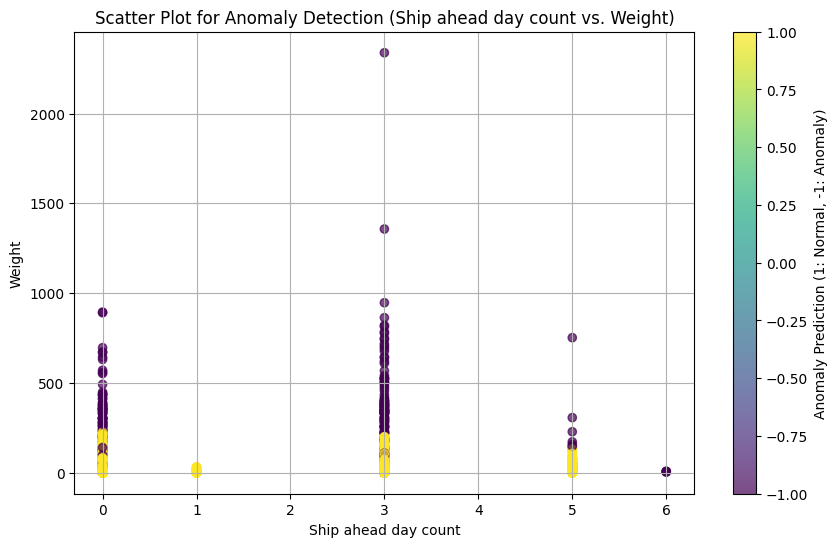

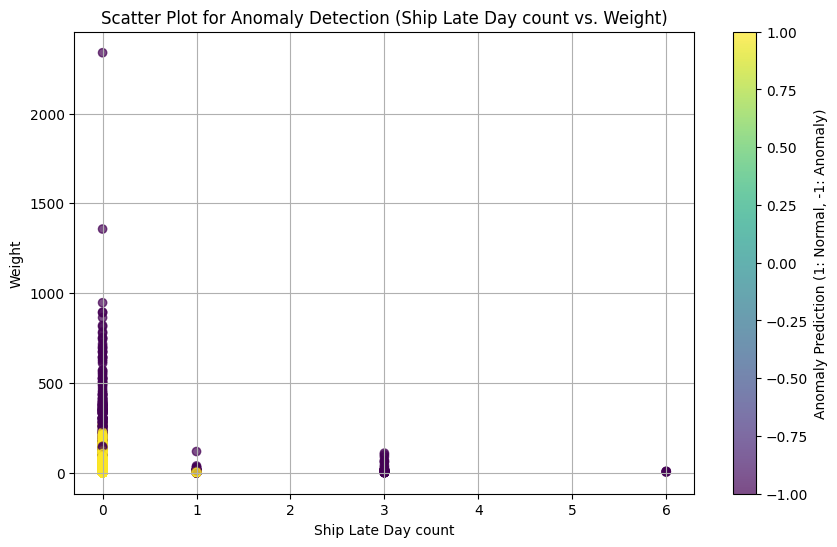

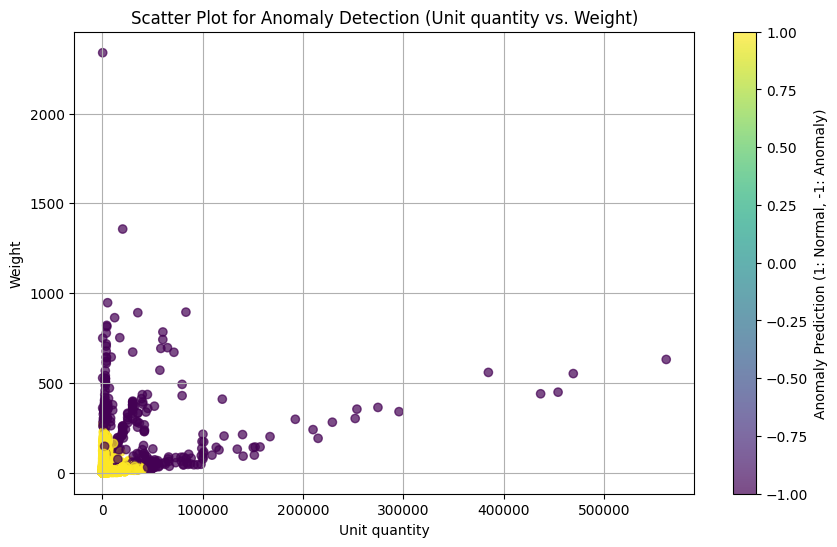

In [26]:
import matplotlib.pyplot as plt

# Create a scatter plot for 'Ship ahead day count'
plt.figure(figsize=(10, 6))
plt.scatter(x_train['Ship_ahead_day_count'], x_train['Weight'], c=y_pred_train, cmap='viridis', alpha=0.7)
plt.title("Scatter Plot for Anomaly Detection (Ship ahead day count vs. Weight)")
plt.xlabel("Ship ahead day count")
plt.ylabel("Weight")
plt.colorbar(label='Anomaly Prediction (1: Normal, -1: Anomaly)')
plt.grid()
plt.show()

# Create a scatter plot for 'Ship Late Day count'
plt.figure(figsize=(10, 6))
plt.scatter(x_train['Ship_Late_Day_count'], x_train['Weight'], c=y_pred_train, cmap='viridis', alpha=0.7)
plt.title("Scatter Plot for Anomaly Detection (Ship Late Day count vs. Weight)")
plt.xlabel("Ship Late Day count")
plt.ylabel("Weight")
plt.colorbar(label='Anomaly Prediction (1: Normal, -1: Anomaly)')
plt.grid()
plt.show()

# Create a scatter plot for 'Unit quantity'
plt.figure(figsize=(10, 6))
plt.scatter(x_train['Unit_quantity'], x_train['Weight'], c=y_pred_train, cmap='viridis', alpha=0.7)
plt.title("Scatter Plot for Anomaly Detection (Unit quantity vs. Weight)")
plt.xlabel("Unit quantity")
plt.ylabel("Weight")
plt.colorbar(label='Anomaly Prediction (1: Normal, -1: Anomaly)')
plt.grid()
plt.show()


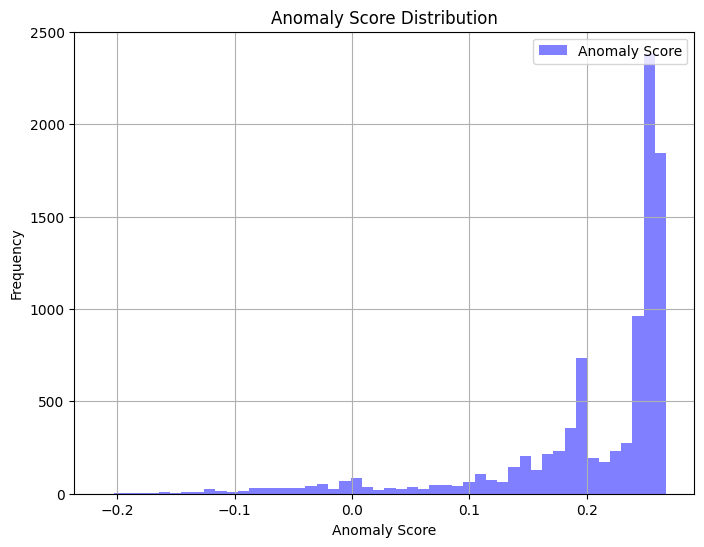

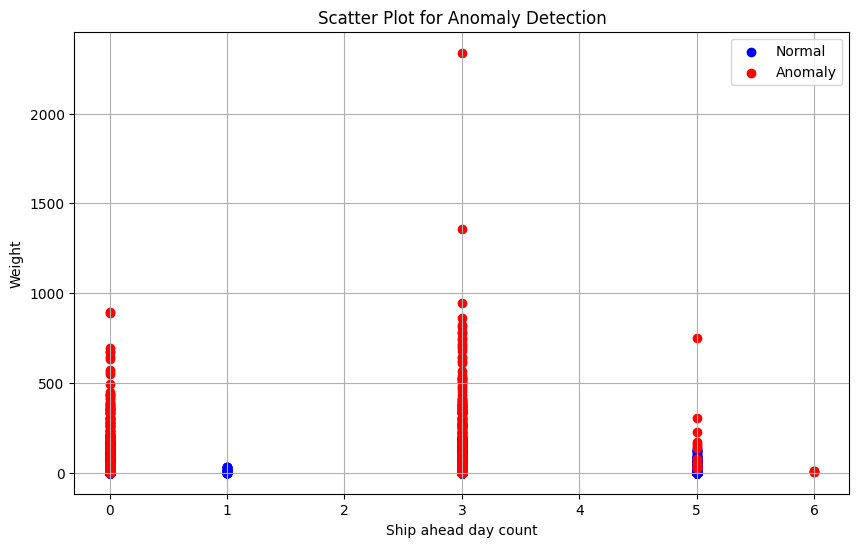

In [27]:
# import matplotlib.pyplot as plt

# # Scatter plot of 'Ship ahead day count' vs. 'Weight' with anomalies highlighted
# plt.figure(figsize=(10, 6))
# plt.scatter(x_train['Ship ahead day count'], x_train['Weight'], c=y_pred_train, cmap='coolwarm', alpha=0.7)
# plt.title('Anomaly Detection: Ship ahead day count vs. Weight')
# plt.xlabel('Ship ahead day count')
# plt.ylabel('Weight')
# plt.colorbar(label='Anomaly Prediction (1: Normal, -1: Anomaly)')
# plt.show()
# import matplotlib.pyplot as plt

# Plot the anomaly scores
plt.figure(figsize=(8, 6))
plt.hist(clf.decision_function(x_train), bins=50, alpha=0.5, color='blue', label='Anomaly Score')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score Distribution')
plt.legend(loc='upper right')
plt.grid()
plt.show()

import matplotlib.pyplot as plt

# Create a scatter plot of 'Ship ahead day count' vs. 'Weight'
plt.figure(figsize=(10, 6))

# Plot normal data points (in blue)
plt.scatter(x_train[y_pred_train == 1]['Ship_ahead_day_count'], x_train[y_pred_train == 1]['Weight'], color='blue', label='Normal')

# Plot anomalies (in red)
plt.scatter(x_train[y_pred_train == -1]['Ship_ahead_day_count'], x_train[y_pred_train == -1]['Weight'], color='red', label='Anomaly')

plt.title('Scatter Plot for Anomaly Detection')
plt.xlabel('Ship ahead day count')
plt.ylabel('Weight')
plt.legend()
plt.grid()
plt.show()



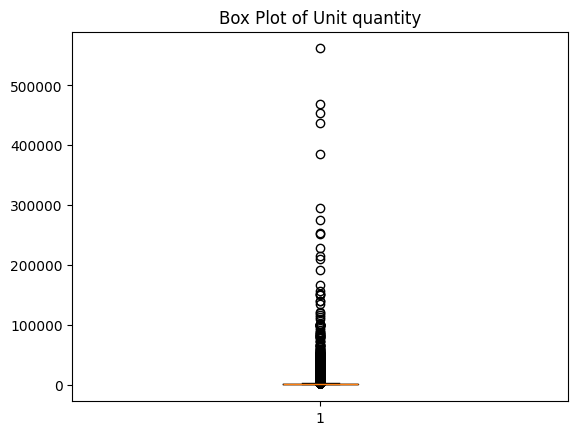

In [28]:
plt.boxplot(x_train['Unit_quantity'])
plt.title("Box Plot of Unit quantity")
plt.show()